# Analytics en Redes sociales - Fase 1

 # 1. Cargue de datos

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Recargamos los datos de nodos y arcos
nodos_df = pd.read_excel('Nodos.xlsx')
arcos_df = pd.read_excel('Arcos.xlsx')

# Procedemos con la limpieza de los datos, manteniendo solo las columnas necesarias para el análisis
# Para los nodos, nos interesan principalmente el Id y posiblemente la Location como atributos básicos
nodos = nodos_df[['Id']].copy()

# Para los arcos, mantenemos las columnas de Source y Target
arcos = arcos_df[['Source', 'Target']].copy()

In [2]:
nodos

Id
0                Tencent
1         Warburg Pincus
2                Twitter
3                Ubisoft
4                 WeWork
...                  ...
2206  Activation Capital
2207                Gavi
2208         BF Holdings
2209         GO Virginia
2210          Amit Gupta

[2211 rows x 1 columns]

In [3]:
arcos

Source      Target
0       01 Advisors    Electric
1       01 Advisors      Origin
2     17Capital LLP   NewSpring
3               1kx     Arweave
4               1kx     Rarible
...             ...         ...
4182         Zomato  Shiprocket
4183           Zoom     Genesys
4184           Zoom  Theta Lake
4185           Zoom  monday.com
4186           Zoom  Observe.AI

[4187 rows x 2 columns]

In [4]:
arcos = arcos.dropna(subset=['Source'])
# Filtrar nodos para mantener solo aquellos que aparecen como 'Source' en 'arcos'
nodos_filtrados = nodos[nodos['Id'].isin(arcos['Source'])]

# Asegurarse de que 'arcos' solo incluye nodos presentes en 'nodos_filtrados'
arcos = arcos[arcos['Target'].isin(nodos_filtrados['Id']) & arcos['Source'].isin(nodos_filtrados['Id'])]
arcos

Source            Target
2                    17Capital LLP         NewSpring
5                              2TM           Figment
7                              2TM  TC - TradersClub
11                    500 Startups    Animoca Brands
12                    500 Startups         AngelList
...                            ...               ...
4165                  Y Combinator     Protocol Labs
4167                         Yahoo            Google
4170  Youth Business International         Accenture
4175  Zhejiang Geely Holding Group           Daimler
4176                      ZhenFund             Huobi

[829 rows x 2 columns]

In [5]:
# Paso 1: Calcular el número de inversiones realizadas por cada inversionista
num_inversiones_por_inversionista = arcos.groupby('Source').size()

# Paso 2: Identificar los inversionistas con 2 o más inversiones
inversionistas_con_multiples_inversiones = num_inversiones_por_inversionista[num_inversiones_por_inversionista > 1].index

# Paso 3: Contar cuántos inversionistas cumplen con este criterio
num_inversionistas_con_multiples_inversiones = len(inversionistas_con_multiples_inversiones)

# Paso 4: Imprimir los nombres de los inversionistas y el número total que cumplen con el criterio
print("Número de inversionistas con 2 o más inversiones:", num_inversionistas_con_multiples_inversiones)

arcos = arcos[arcos['Source'].isin(inversionistas_con_multiples_inversiones)]
arcos

Número de inversionistas con 2 o más inversiones: 131


Source               Target
5                    2TM              Figment
7                    2TM     TC - TradersClub
11          500 Startups       Animoca Brands
12          500 Startups            AngelList
15          500 Startups               Twilio
...                  ...                  ...
4079  Winklevoss Capital  Ethereum Foundation
4102        Y Combinator             Wefunder
4132        Y Combinator             DoorDash
4164        Y Combinator             Razorpay
4165        Y Combinator        Protocol Labs

[506 rows x 2 columns]

In [6]:
import networkx as nx

# Crear el grafo dirigido desde 'arcos_filtrados'
G = nx.from_pandas_edgelist(arcos, source='Source', target='Target', create_using=nx.DiGraph())


In [7]:
arcos.groupby('Source').size()

Source
2TM                   2
500 Startups          7
8VC                   2
9Yards Capital        2
Accel                 8
                     ..
Walmart               2
Warburg Pincus        2
Wavemaker Partners    3
Winklevoss Capital    2
Y Combinator          4
Length: 131, dtype: int64

In [8]:
# Grado de salida y entrada para identificar inversores clave y organizaciones principales
out_degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)

# Otras medidas de centralidad pueden incluir betweenness_centrality, closeness_centrality, etc.


# 2. Visualización y medidas

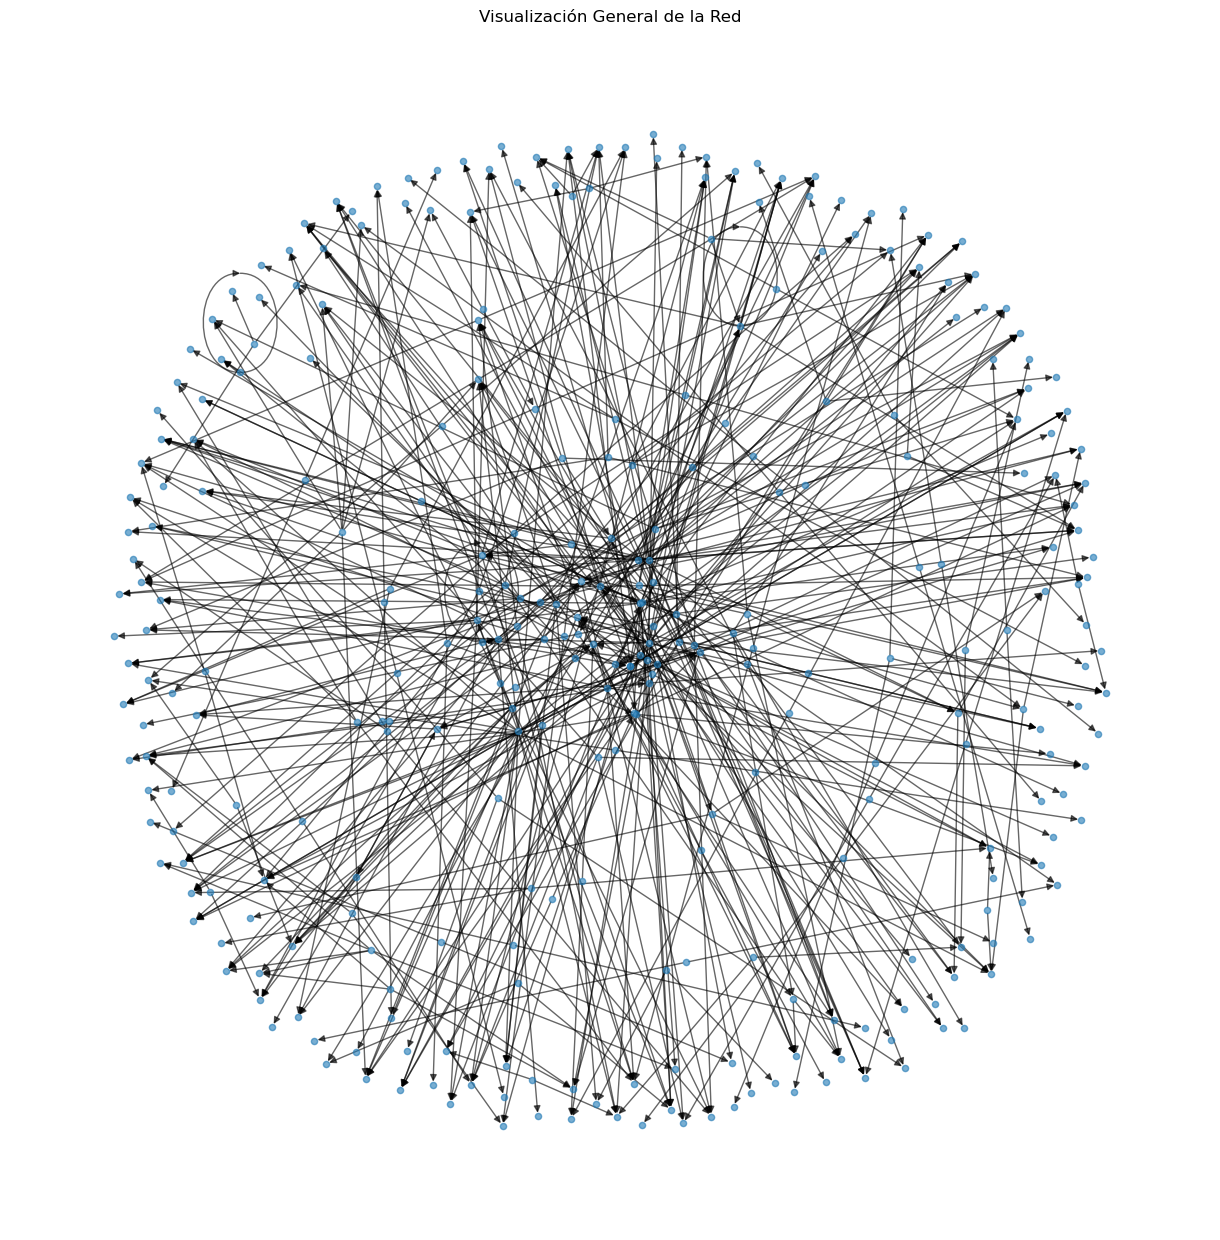

In [9]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=20, arrows=True, with_labels=False, alpha=0.6)
plt.title("Visualización General de la Red")
plt.show()

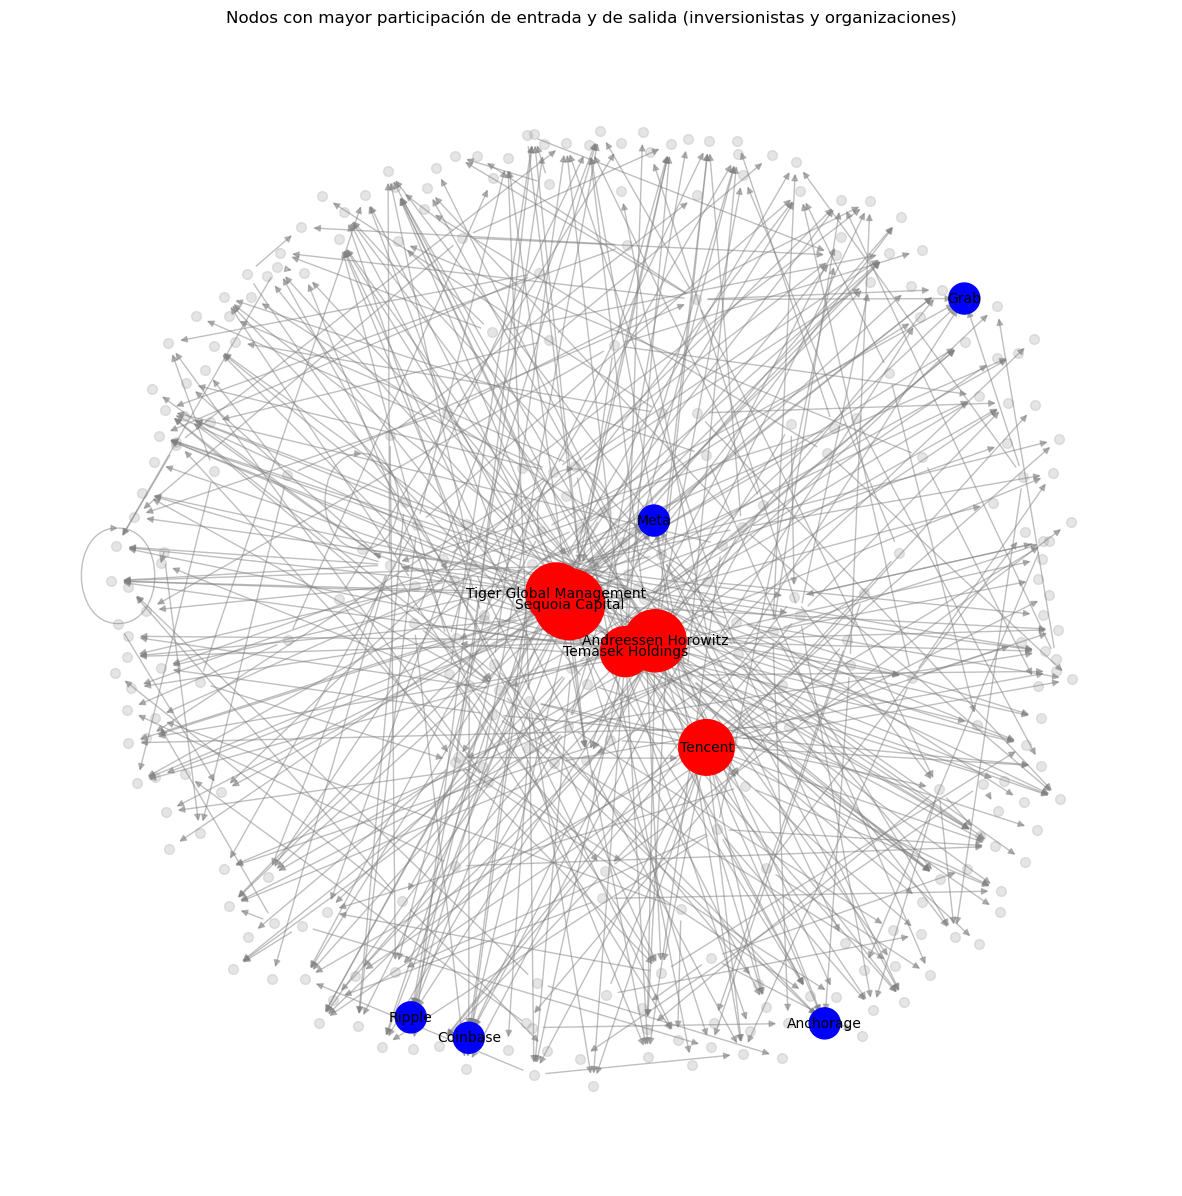

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Asumiendo que G es tu grafo dirigido

# Calcular el grado de salida e ingreso para cada nodo
out_degree_dict = dict(G.out_degree())
in_degree_dict = dict(G.in_degree())

# Encontrar los top 15 nodos por grado de salida e ingreso
top_out_degree_nodes = sorted(out_degree_dict, key=out_degree_dict.get, reverse=True)[:5]
top_in_degree_nodes = sorted(in_degree_dict, key=in_degree_dict.get, reverse=True)[:5]

# Crear la disposición de la red
pos = nx.spring_layout(G,k=0.5)

# Visualización
plt.figure(figsize=(15, 15))

# Dibujar todos los nodos en color gris para el fondo
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='grey', alpha=0.2)

# Dibujar los top 15 nodos por grado de salida en color rojo
nx.draw_networkx_nodes(G, pos, nodelist=top_out_degree_nodes, node_color='red', label='Inversionistas', node_size=[out_degree_dict[node] * 100 for node in top_out_degree_nodes])

# Dibujar los top 15 nodos por grado de ingreso en color azul
nx.draw_networkx_nodes(G, pos, nodelist=top_in_degree_nodes, node_color='blue', label='Organizaciones', node_size=[in_degree_dict[node] * 100 for node in top_in_degree_nodes])

# Dibujar los arcos
nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.5)

# Opcional: Etiquetas para los nodos top, si se desea mostrar sus nombres
labels_out = {node: node for node in top_out_degree_nodes}
labels_in = {node: node for node in top_in_degree_nodes}
nx.draw_networkx_labels(G, pos, labels={**labels_out, **labels_in}, font_size=10)

plt.title("Nodos con mayor participación de entrada y de salida (inversionistas y organizaciones)")
plt.axis('off')
plt.show()


In [11]:
top_out_degree_nodes

['Sequoia Capital',
 'Andreessen Horowitz',
 'Tiger Global Management',
 'Tencent',
 'Temasek Holdings']

In [12]:
top_in_degree_nodes

['Grab', 'Meta', 'Ripple', 'Coinbase', 'Anchorage']

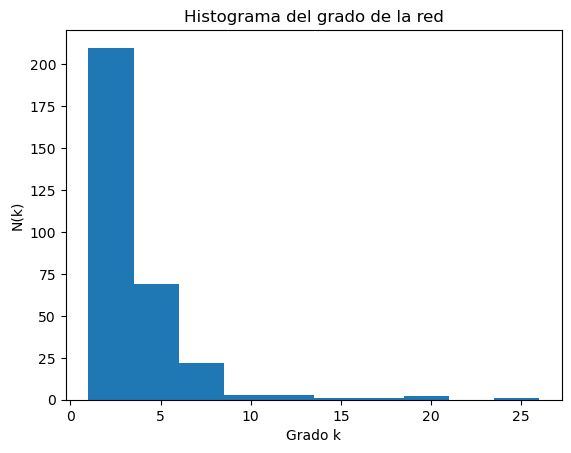

In [13]:
grado=[]
for node in G.nodes():
    grado.append(G.degree(node))
a=plt.hist(grado)
plt.title('Histograma del grado de la red')
plt.xlabel ("Grado k")
plt.ylabel ("N(k)")
plt.show()

In [14]:
reciprocidad=nx.reciprocity(G)
print(reciprocidad)
print("Esta es la reciprocidad")

0.003952569169960474
Esta es la reciprocidad


In [15]:
# Ejemplo de cálculo de grado para redes dirigidas
grado_entrada = dict(G.in_degree())
grado_salida = dict(G.out_degree())

# Cálculo de otras medidas de centralidad (ejemplo conceptual)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)


In [16]:
# Ejemplo de identificación de actores relevantes por grado de entrada
top_in_degree = sorted(grado_entrada.items(), key=lambda x: x[1], reverse=True)[:10]

# Los actores relevantes según otras medidas se identifican de manera similar


In [17]:
top_in_degree

[('Grab', 5),
 ('Meta', 5),
 ('Ripple', 5),
 ('Coinbase', 5),
 ('Anchorage', 5),
 ('Slack', 5),
 ('Protocol Labs', 5),
 ('Didi', 5),
 ('SenseTime', 5),
 ('Uber', 5)]

In [18]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
page_rank = nx.pagerank(G)


In [19]:
# Identificar el nodo con el mayor grado de centralidad
max_degree_node = max(degree_centrality, key=degree_centrality.get)
max_degree_value = degree_centrality[max_degree_node]
print(f"Nodo con el mayor grado de centralidad: {max_degree_node} ({max_degree_value})")


Nodo con el mayor grado de centralidad: Sequoia Capital (0.08360128617363344)


In [20]:
# Identificar el nodo con la mayor centralidad de intermediación
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
max_betweenness_value = betweenness_centrality[max_betweenness_node]
print(f"Nodo con la mayor centralidad de intermediación: {max_betweenness_node} ({max_betweenness_value})")


Nodo con la mayor centralidad de intermediación: Digital Currency Group (0.0003734052484182139)


In [21]:
# Identificar el nodo con la mayor centralidad de cercanía
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
max_closeness_value = closeness_centrality[max_closeness_node]
print(f"Nodo con la mayor centralidad de cercanía: {max_closeness_node} ({max_closeness_value})")


Nodo con la mayor centralidad de cercanía: Gojek (0.035174900126668615)


In [22]:
# Identificar el nodo con el mayor PageRank
max_page_rank_node = max(page_rank, key=page_rank.get)
max_page_rank_value = page_rank[max_page_rank_node]
print(f"Nodo con el mayor PageRank: {max_page_rank_node} ({max_page_rank_value})")


Nodo con el mayor PageRank: Gojek (0.007304125944843774)


In [23]:
import networkx as nx


# Medidas de los nodos
# Grado
degree_dict = dict(G.degree())
top_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# Centralidad Eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G)
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Betweenness
betweenness = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

# Closeness
closeness = nx.closeness_centrality(G)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]

# Page Rank
pagerank = nx.pagerank(G)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

# Clustering
# En redes dirigidas, la agrupación (clustering) se puede calcular de varias maneras. NetworkX utiliza
# la agrupación de triángulos dirigidos por defecto.
clustering = nx.clustering(G)
top_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)[:5]

# Medidas de la red
# Distribución del grado
degree_distribution = nx.degree_histogram(G)

# Diámetro de la red
# El diámetro puede ser infinito en redes dirigidas si hay nodos no alcanzables entre sí.
# Se puede calcular el diámetro sobre el grafo no dirigido subyacente o sobre la componente gigante.
# diameter = nx.diameter(G.to_undirected())  # Esto solo es válido si la red es completamente conectada.

# Densidad de la red
density = nx.density(G)

# Reciprocidad de la red
reciprocity = nx.reciprocity(G)

# Asortatividad
# Para redes dirigidas, la asortatividad puede ser calculada en términos de 'mixing' de atributos.
asortativity = nx.degree_assortativity_coefficient(G)

# Imprimir los resultados
print("Top 5 por Grado:", top_degree)
print("Top 5 por Centralidad Eigenvector:", top_eigenvector)
print("Top 5 por Betweenness:", top_betweenness)
print("Top 5 por Closeness:", top_closeness)
print("Top 5 por Page Rank:", top_pagerank)
print("Top 5 por Clustering:", top_clustering)
print("Distribución del Grado:", degree_distribution)
print("Densidad de la red:", density)
print("Reciprocidad de la red:", reciprocity)
print("Asortatividad de la red:", asortativity)
# print("Diámetro de la red:", diameter)


Top 5 por Grado: [('Sequoia Capital', 26), ('Andreessen Horowitz', 20), ('Tiger Global Management', 19), ('Tencent', 18), ('Silver Lake', 14)]
Top 5 por Centralidad Eigenvector: [('Polygon', 0.31427566916163513), ('Protocol Labs', 0.31426969607069194), ('Ripio', 0.31426969607069194), ('Figment', 0.3142675278691183), ('DoorDash', 0.3142668863062341)]
Top 5 por Betweenness: [('Digital Currency Group', 0.0003734052484182139), ('Tencent', 0.0003734052484182139), ('Animoca Brands', 0.0002904263043252774), ('Silver Lake', 0.0002904263043252774), ('Didi', 0.0002644953842962348)]
Top 5 por Closeness: [('Gojek', 0.035174900126668615), ('Didi', 0.02740109045155879), ('Careem', 0.02699469079488522), ('Uber', 0.02587658857755321), ('Dapper Labs', 0.02572347266881029)]
Top 5 por Page Rank: [('Gojek', 0.007304125944843774), ('Careem', 0.006912140473200084), ('Bolt', 0.006105010680231425), ('Figment', 0.006100428706670363), ('Reliance Jio', 0.0057410012185170455)]
Top 5 por Clustering: [('DFINITY', 0

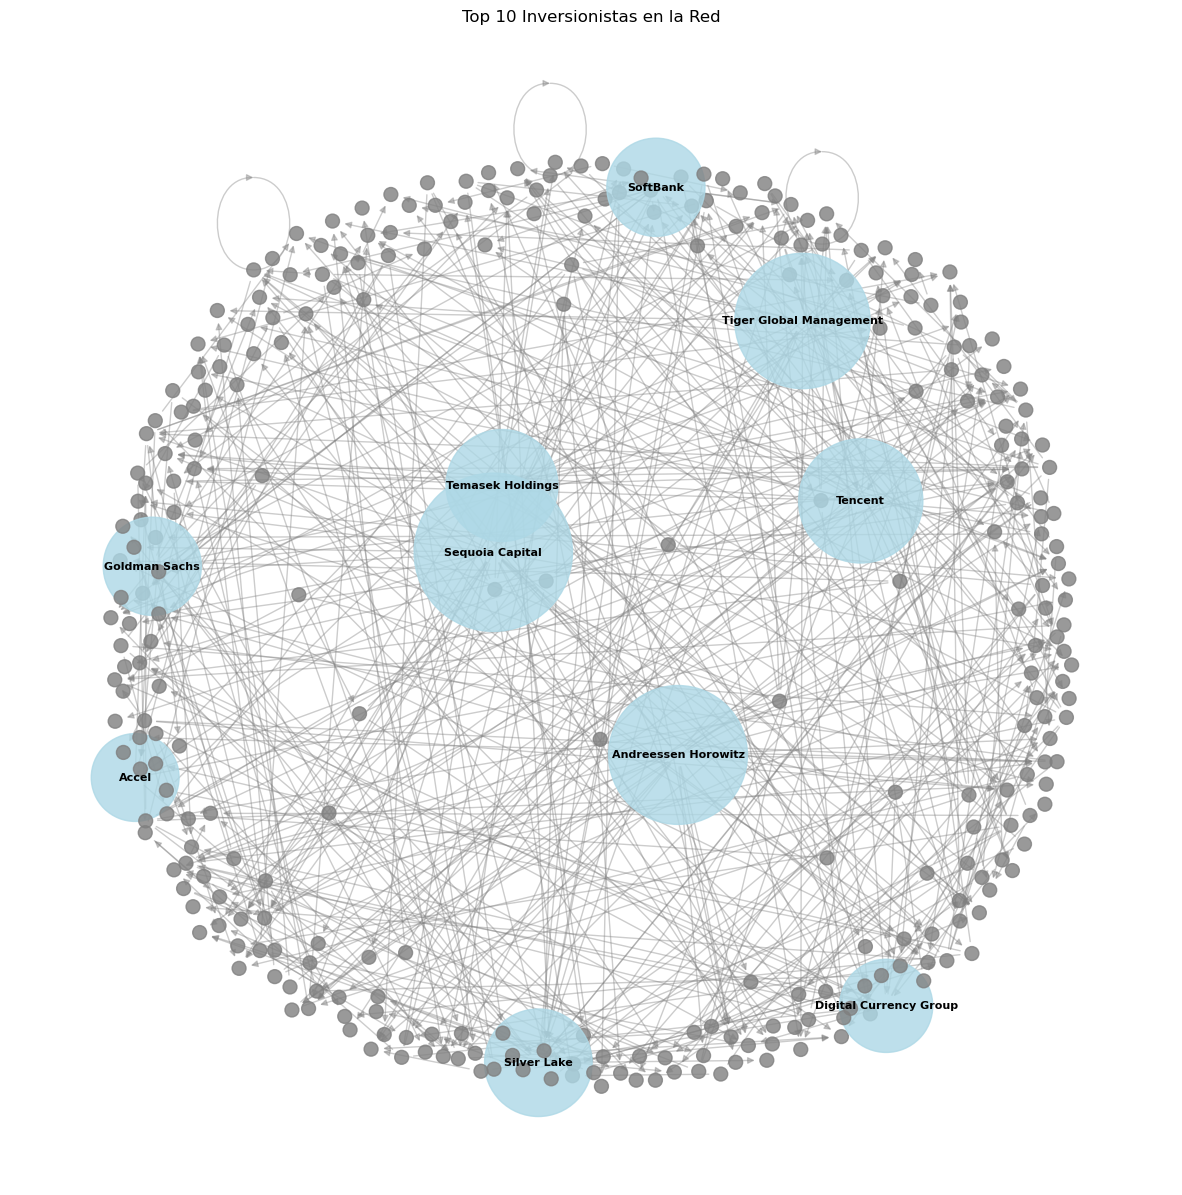

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Asumiendo que G es tu grafo dirigido creado con NetworkX
out_degree_dict = dict(G.out_degree())  # Calcula el grado de salida (out-degree) de cada nodo

# Ordena y selecciona el top 15 de inversionistas por su grado de salida
top_10_investors = sorted(out_degree_dict, key=out_degree_dict.get, reverse=True)[:10]
# Escala para el tamaño de los nodos, ajusta según necesites
scale_factor = 100

# Tamaños de nodos: más grande para el top 15, estándar para los demás
node_sizes = [out_degree_dict[node] * scale_factor *5 if node in top_10_investors else 100 for node in G.nodes()]

# Colores de nodos: azul claro para el top 15, gris para los demás
node_colors = ['lightblue' if node in top_10_investors else 'grey' for node in G.nodes()]
# Crear la disposición de la red
pos = nx.spring_layout(G, k=1.25)

# Visualización
plt.figure(figsize=(15, 15))

# Dibujar todos los nodos
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)

# Dibujar los arcos
nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.4)

# Etiquetar solo el top 15 de inversionistas
labels = {node: node for node in top_10_investors}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_weight='bold')

plt.title("Top 10 Inversionistas en la Red")
plt.axis('off')
plt.show()
